In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Text(0, 0.5, 'Income')

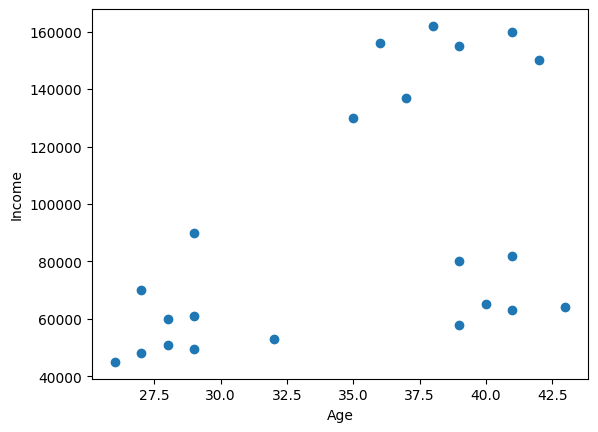

In [6]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel("Income")

In [16]:
k = KMeans(n_clusters=3)
y_predicted=k.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [21]:
k.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [26]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

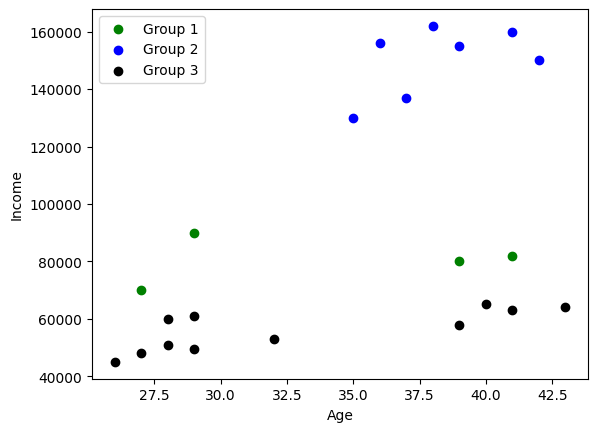

In [30]:
plt.scatter(df1.Age, df1['Income($)'], color='green', label='Group 1')
plt.scatter(df2.Age, df2['Income($)'], color='blue', label='Group 2')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Group 3')
plt.xlabel('Age')
plt.ylabel("Income")
plt.legend()

In [33]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


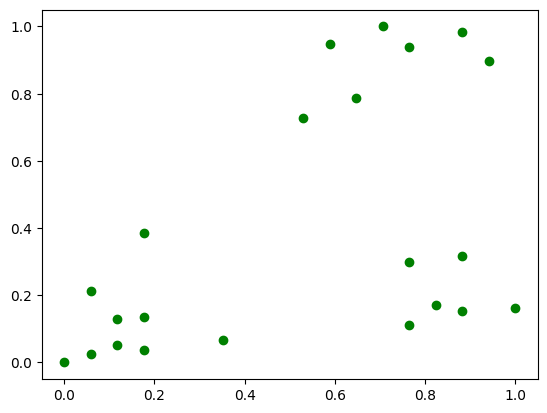

In [35]:
plt.scatter(df.Age, df['Income($)'], color='green', label='Group 1')

In [42]:
kn = KMeans(n_clusters=3)
y_predicted=kn.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [44]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [43]:
kn.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [46]:
df4 = df[df.cluster == 0]
df5 = df[df.cluster == 1]
df6 = df[df.cluster == 2]

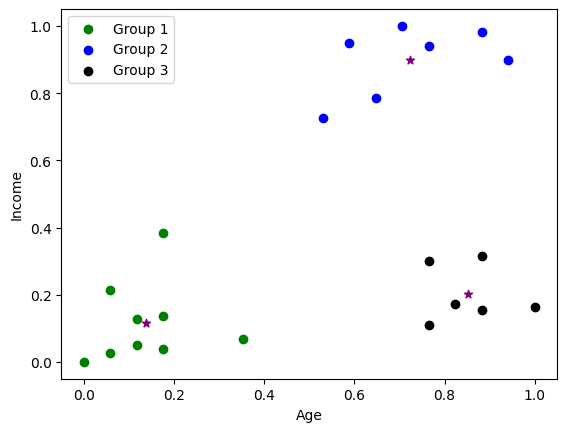

In [49]:
plt.scatter(df4.Age, df4['Income($)'], color='green', label='Group 1')
plt.scatter(df5.Age, df5['Income($)'], color='blue', label='Group 2')
plt.scatter(df6.Age, df6['Income($)'], color='black', label='Group 3')
plt.xlabel('Age')
plt.ylabel("Income")
plt.legend()
plt.scatter(kn.cluster_centers_[:,0], kn.cluster_centers_[:,1], color='purple', marker='*', label='centeroid')

In [50]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

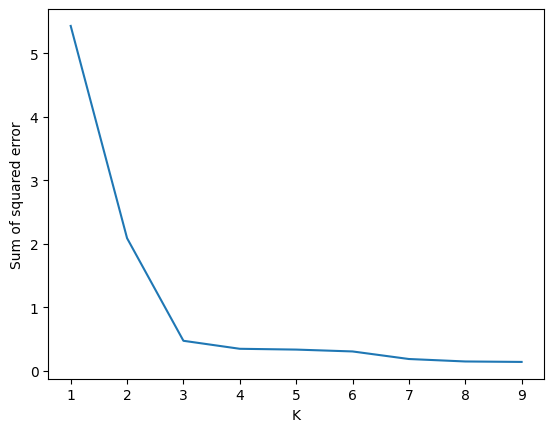

In [51]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)